### Table of Contents
- [Load necessary libraries, combined_df, and brief inspection](#load-necessary-libraries-combined-df-and-brief-inspection)
- [Print column names](#print-column-names)
- [Print the different data types](#print-the-different-data-types)
- [Number of samples for each patient](#number-of-samples-for-each-patient)
- [Missing Data Analysis](#missing-data-analysis)
- [Print correlations with respect to 'glucose'](#print-correlations-with-respect-to-glucose)
- [Create df with limited columns for EDA](#create-df-with-limited-columns-for-eda)
- [Histograms of Features](#histograms-of-features)
- [Boxplots of Features](#boxplots-of-features)
- [Correlation Matrix of Features](#correlation-matrix-of-features)
- [Scatter Plots of Features](#scatter-plots-of-features)
- [Log Feature improvement of Correlation wrt Glucose](#log-feature-improvement-of-correlation-wrt-glucose)
- [Time Series plot For Patient 001](#time-series-plot-for-patient-001)
- [Categorical Feature Addition - Night, Morning, Afternoon, Evening](#categorical-feature-addition-night-morning-afternoon-evening)
- [Categorical Get Dummies for day_period](#categorical-get-dummies-for-day-period)
- [Categorical Correlations wrt Glucose](#categorical-correlations-wrt-glucose)
- [Augmented Dickey-Fuller (ADF) Test](#augmented-dickey-fuller-adf-test)


### Load necessary libraries, combined_df, and brief inspection

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [26]:
combined_df = pd.read_csv('combined_df.csv')
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Setting 'datetime' as the index
combined_df.set_index('datetime', inplace=True)


In [27]:
combined_df.head()

,glucose,patient_id,Gender,HbA1c,acc_mean,bvp_mean,eda_mean,hr_mean,ibi_mean,temp_mean,...,food_dietary_fiber,food_sugar,food_protein,food_total_fat,food_calorie_ffwd,food_total_carb_ffwd,food_dietary_fiber_ffwd,food_sugar_ffwd,food_protein_ffwd,food_total_fat_ffwd
datetime,,,,,,,,,,,,,,,,,,,,,
2020-02-13 17:23:32,61.0,1,0,5.5,87.095625,-0.004786,0.848050,82.318333,0.713904,33.171867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-13 17:28:32,59.0,1,0,5.5,88.107187,-0.001255,0.632578,75.429167,0.837369,33.136333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-13 17:33:32,58.0,1,0,5.5,57.597604,0.020368,1.544714,75.973400,0.777253,33.244767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-13 17:38:32,59.0,1,0,5.5,66.899687,-0.009613,1.839445,77.138967,0.808537,33.315067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-13 17:43:31,63.0,1,0,5.5,29.774792,-0.012741,4.880899,81.056267,0.760995,33.660067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Print column names

In [28]:
combined_df.columns

Index(['glucose', 'patient_id', 'Gender', 'HbA1c', 'acc_mean', 'bvp_mean',
       'eda_mean', 'hr_mean', 'ibi_mean', 'temp_mean', 'eda_std', 'eda_min',
       'eda_max', 'eda_q1', 'eda_q3', 'eda_skew', 'eda_peaks', 'acc_x_mean',
       'acc_x_std', 'acc_x_min', 'acc_x_max', 'acc_x_q1', 'acc_x_q3',
       'acc_x_skew', 'acc_x_2hr_mean', 'acc_x_2hr_max', 'acc_y_mean',
       'acc_y_std', 'acc_y_min', 'acc_y_max', 'acc_y_q1', 'acc_y_q3',
       'acc_y_skew', 'acc_y_2hr_mean', 'acc_y_2hr_max', 'acc_z_mean',
       'acc_z_std', 'acc_z_min', 'acc_z_max', 'acc_z_q1', 'acc_z_q3',
       'acc_z_skew', 'acc_z_2hr_mean', 'acc_z_2hr_max', 'acc_std', 'acc_min',
       'acc_max', 'acc_q1', 'acc_q3', 'acc_skew', 'acc_2hr_mean',
       'acc_2hr_max', 'hr_std', 'hr_min', 'hr_max', 'hr_q1', 'hr_q3',
       'hr_skew', 'temp_std', 'temp_min', 'temp_max', 'temp_q1', 'temp_q3',
       'temp_skew', 'ibi_std', 'ibi_min', 'ibi_max', 'ibi_q1', 'ibi_q3',
       'ibi_skew', 'bvp_std', 'bvp_min', 'bvp_max', 'bvp_q

In [29]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26665 entries, 2020-02-13 17:23:32 to 2020-07-23 22:28:07
Data columns (total 88 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   glucose                  26665 non-null  float64
 1   patient_id               26665 non-null  int64  
 2   Gender                   26665 non-null  int64  
 3   HbA1c                    26665 non-null  float64
 4   acc_mean                 26665 non-null  float64
 5   bvp_mean                 26665 non-null  float64
 6   eda_mean                 26665 non-null  float64
 7   hr_mean                  26665 non-null  float64
 8   ibi_mean                 26665 non-null  float64
 9   temp_mean                26665 non-null  float64
 10  eda_std                  26665 non-null  float64
 11  eda_min                  26665 non-null  float64
 12  eda_max                  26665 non-null  float64
 13  eda_q1                   26665 non-null  

Print the different data types

In [30]:
combined_df.dtypes.value_counts()


float64    86
int64       2
Name: count, dtype: int64

### Number of samples for each patient

In [31]:
combined_df["patient_id"].value_counts().head(17)


patient_id
5     2192
1     2014
7     1995
8     1966
11    1966
9     1893
2     1877
16    1792
13    1752
10    1653
12    1628
6     1486
14    1438
3     1276
4     1244
15     493
Name: count, dtype: int64

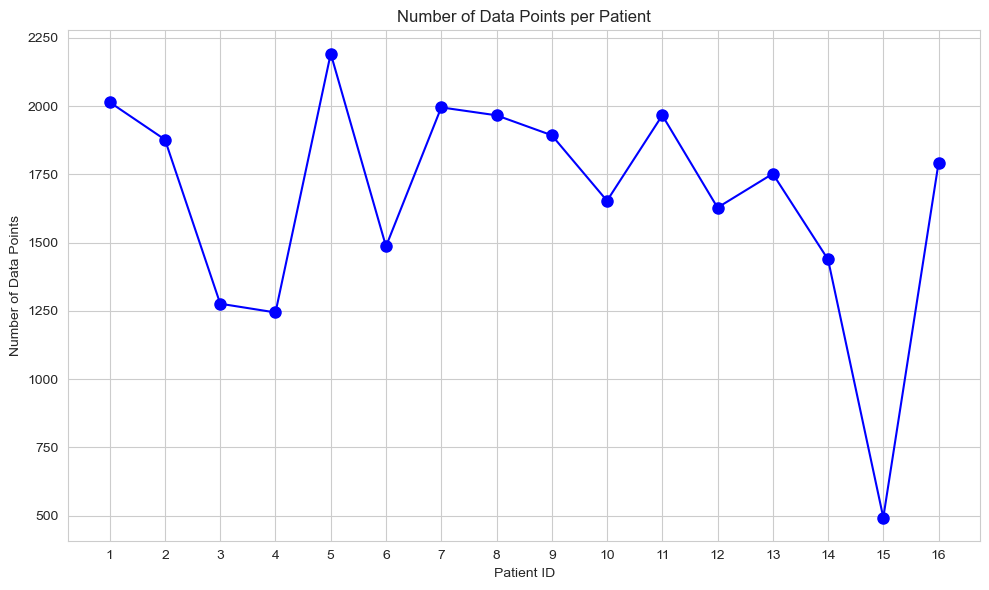

In [32]:
# Calculate value counts for patient_id
patient_counts = combined_df['patient_id'].value_counts().sort_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(patient_counts.index, patient_counts.values, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Number of Data Points per Patient')
plt.xlabel('Patient ID')
plt.ylabel('Number of Data Points')
plt.xticks(patient_counts.index)
plt.grid(True)
plt.tight_layout()

plt.show()


Missing Data Analysis

In [33]:
missing_values = combined_df.isnull().sum()

# Sort missing_values Series in descending order
missing_values_sorted = missing_values.sort_values(ascending=False)

# Print sorted missing values
print(missing_values_sorted)

glucose                0
patient_id             0
ibi_std                0
temp_skew              0
temp_q3                0
                      ..
acc_y_std              0
acc_y_mean             0
acc_x_2hr_max          0
acc_x_2hr_mean         0
food_total_fat_ffwd    0
Length: 88, dtype: int64


Print correlations with respect to 'glucose'

In [34]:
# Select only numeric columns
numeric_columns = combined_df.select_dtypes(include=[np.number])

# Compute correlation of 'glucose' with other columns
# Calculate correlations
correlations = numeric_columns.corr()['glucose']

# Sort correlations by absolute value, but keep the original positive/negative correlations
sorted_correlations = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Top 30 correlations
top_30_correlations = sorted_correlations.head(50)

print(top_30_correlations)



glucose                 1.000000
Gender                  0.288043
HbA1c                   0.192463
acc_x_max              -0.174532
acc_x_q3               -0.166453
acc_x_2hr_mean         -0.163795
food_sugar_ffwd         0.161010
eda_max                -0.156942
acc_x_mean             -0.153588
eda_mean               -0.150663
eda_q3                 -0.148611
eda_q1                 -0.138039
acc_z_std              -0.132580
acc_x_q1               -0.131232
eda_min                -0.126083
acc_std                -0.123440
acc_max                -0.123220
acc_z_min               0.121160
acc_y_std              -0.119563
acc_y_min               0.117117
acc_x_2hr_max          -0.113518
eda_std                -0.107351
acc_y_max              -0.104682
temp_mean               0.103961
temp_min                0.103736
temp_q1                 0.102528
acc_x_std              -0.101636
acc_2hr_mean           -0.098238
temp_q3                 0.097006
acc_q3                 -0.095201
food_total

Create df with limited columns for EDA

In [35]:
eda_df = combined_df[['glucose', 'patient_id', 'Gender', 'HbA1c', 'acc_x_max', 'eda_max', 'temp_mean', 'ibi_q1', 'food_sugar_ffwd', 'bvp_mean', 'hr_mean',
                      'food_total_carb_ffwd']]


Histograms of Features

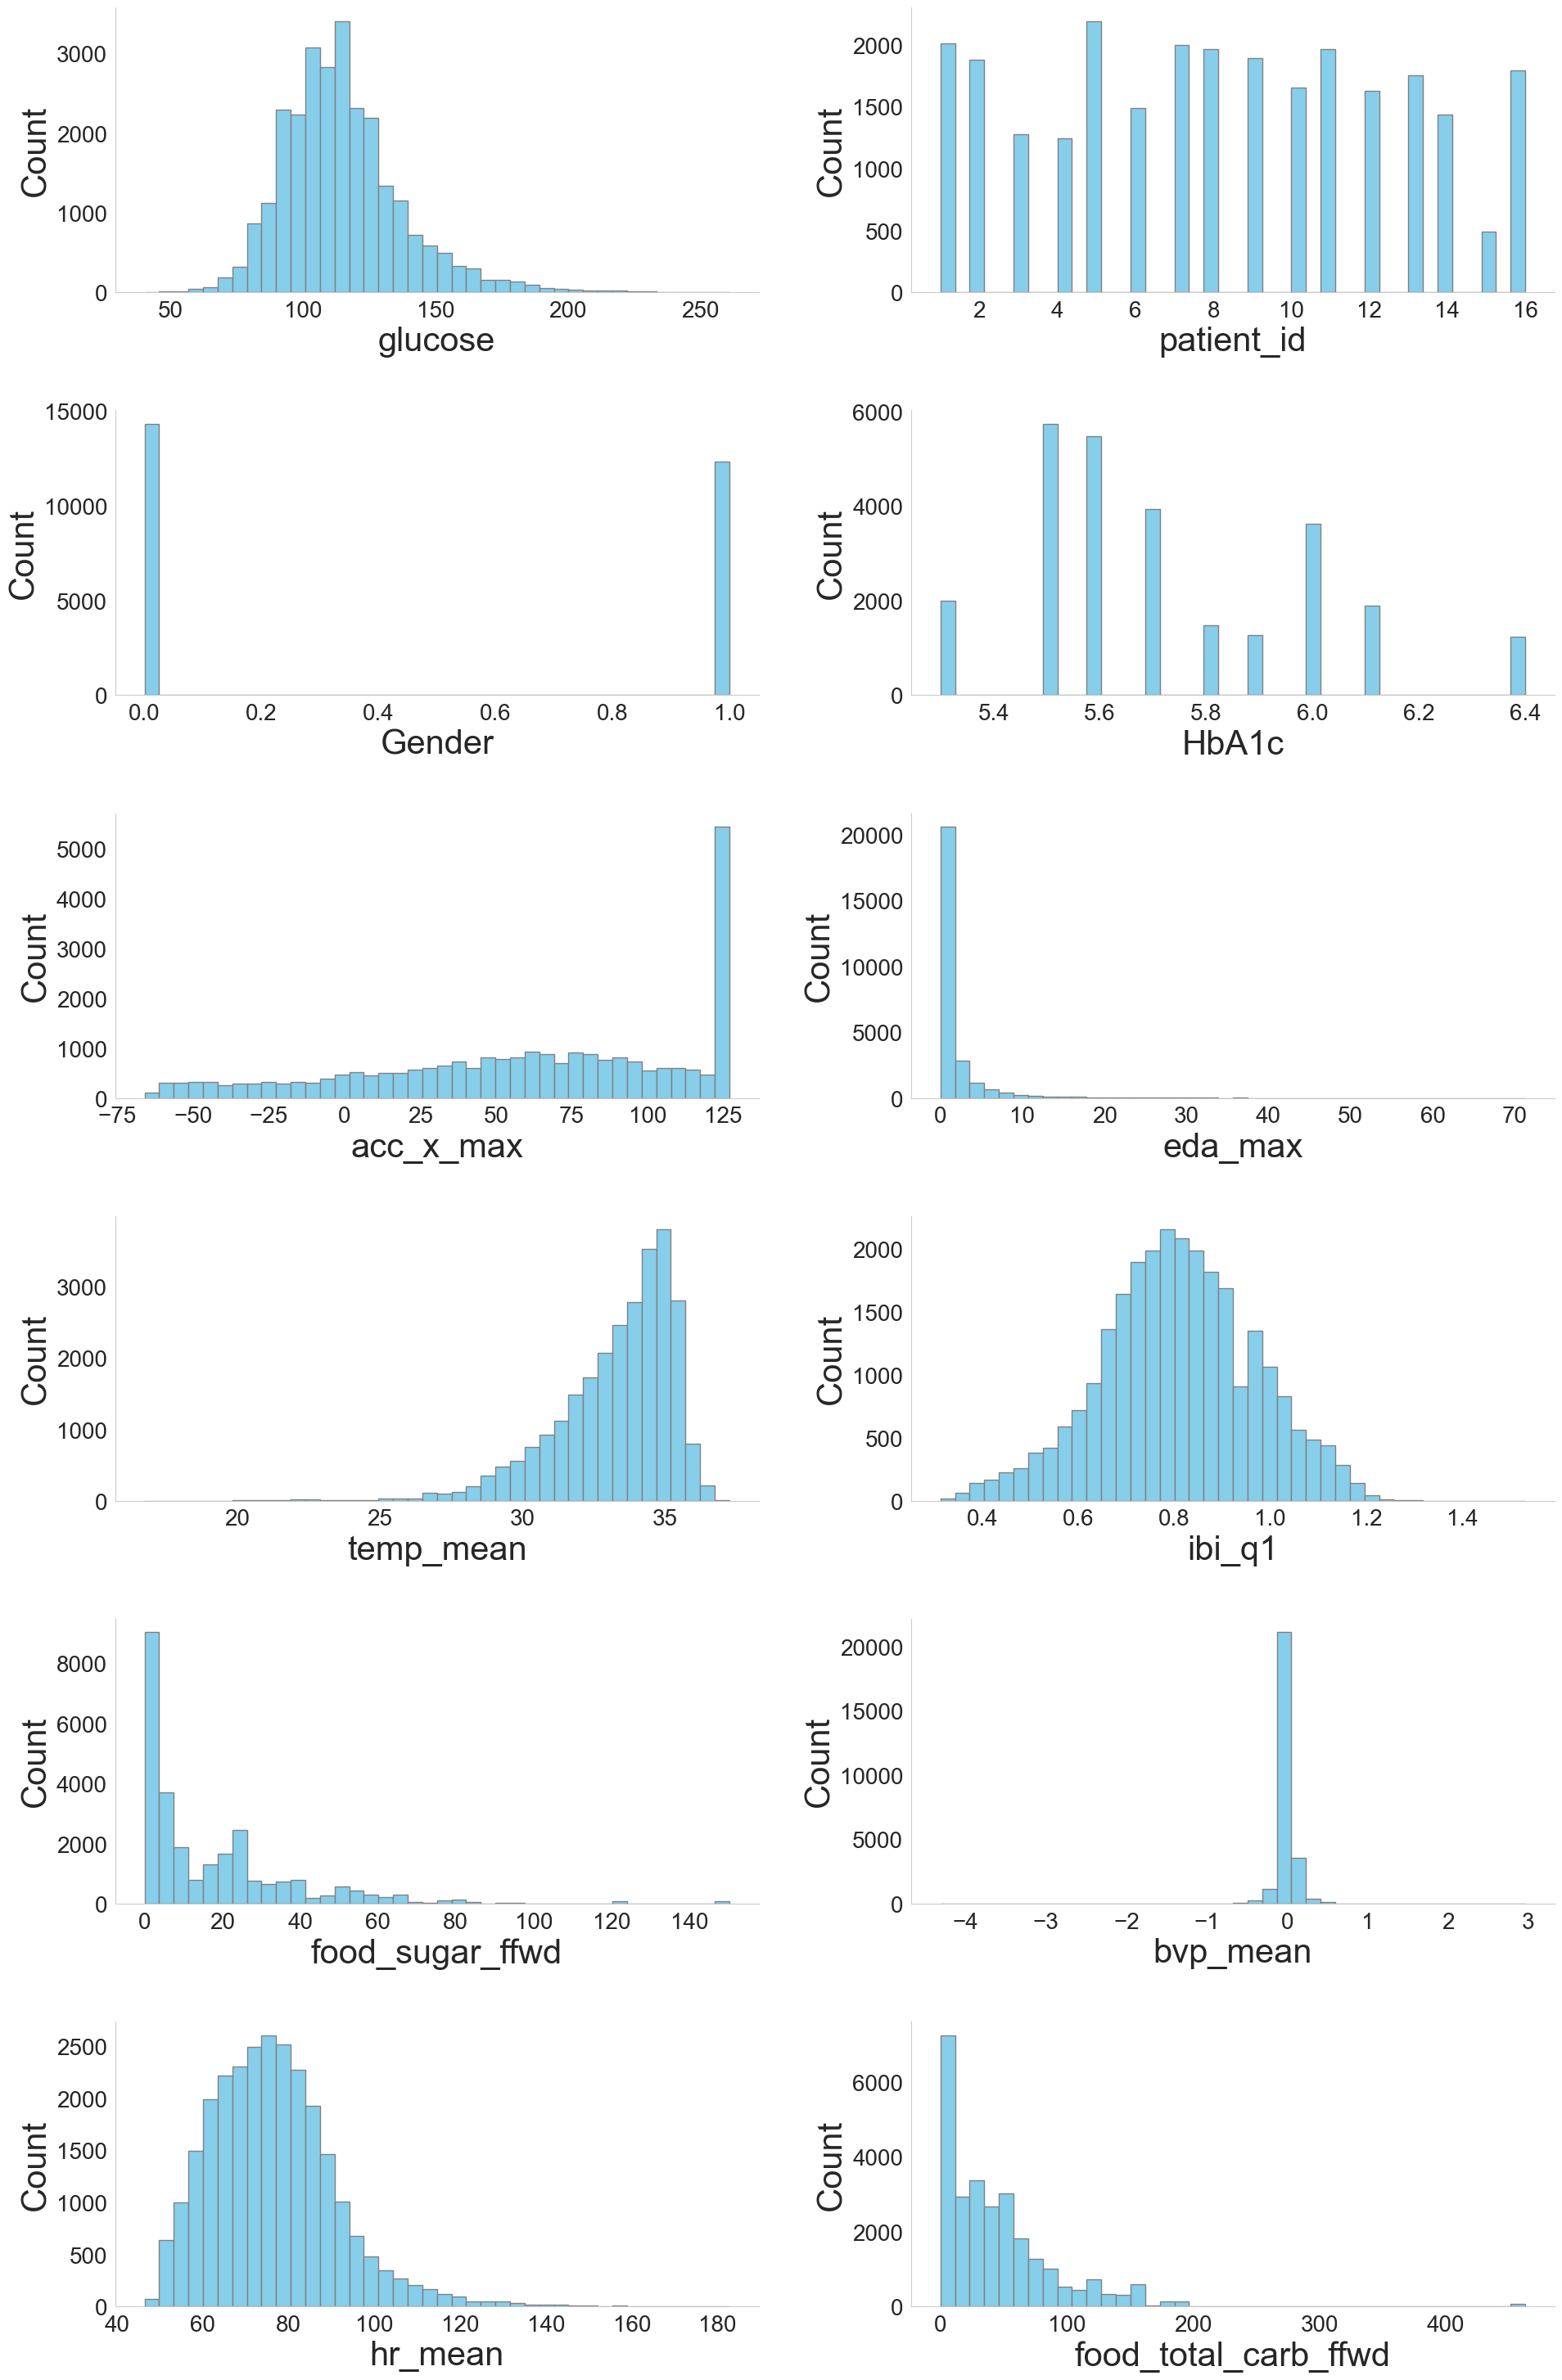

In [36]:
# Set global font size
plt.rcParams.update({'font.size': 20})

# Creating histograms with improved visuals
def plot_histograms(df):
    # Determine the number of columns and rows for the subplots
    num_columns = 2
    num_rows = (len(df.columns) + num_columns - 1) // num_columns
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 30))
    axes = axes.flatten()

    # Plot each column
    for i, column in enumerate(df.columns):
        ax = axes[i]
        df[column].hist(bins=40, ax=ax, color='skyblue', edgecolor='gray')
        
        ax.set_xlabel(column, fontsize=30)
        ax.set_ylabel('Count', fontsize=30)
        ax.grid(False)  # Disable grid for cleaner look
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(pad=2.0)
    plt.show()

# Example usage
plot_histograms(eda_df)

# Reset global font properties to default
plt.rcdefaults()

Boxplots of Features

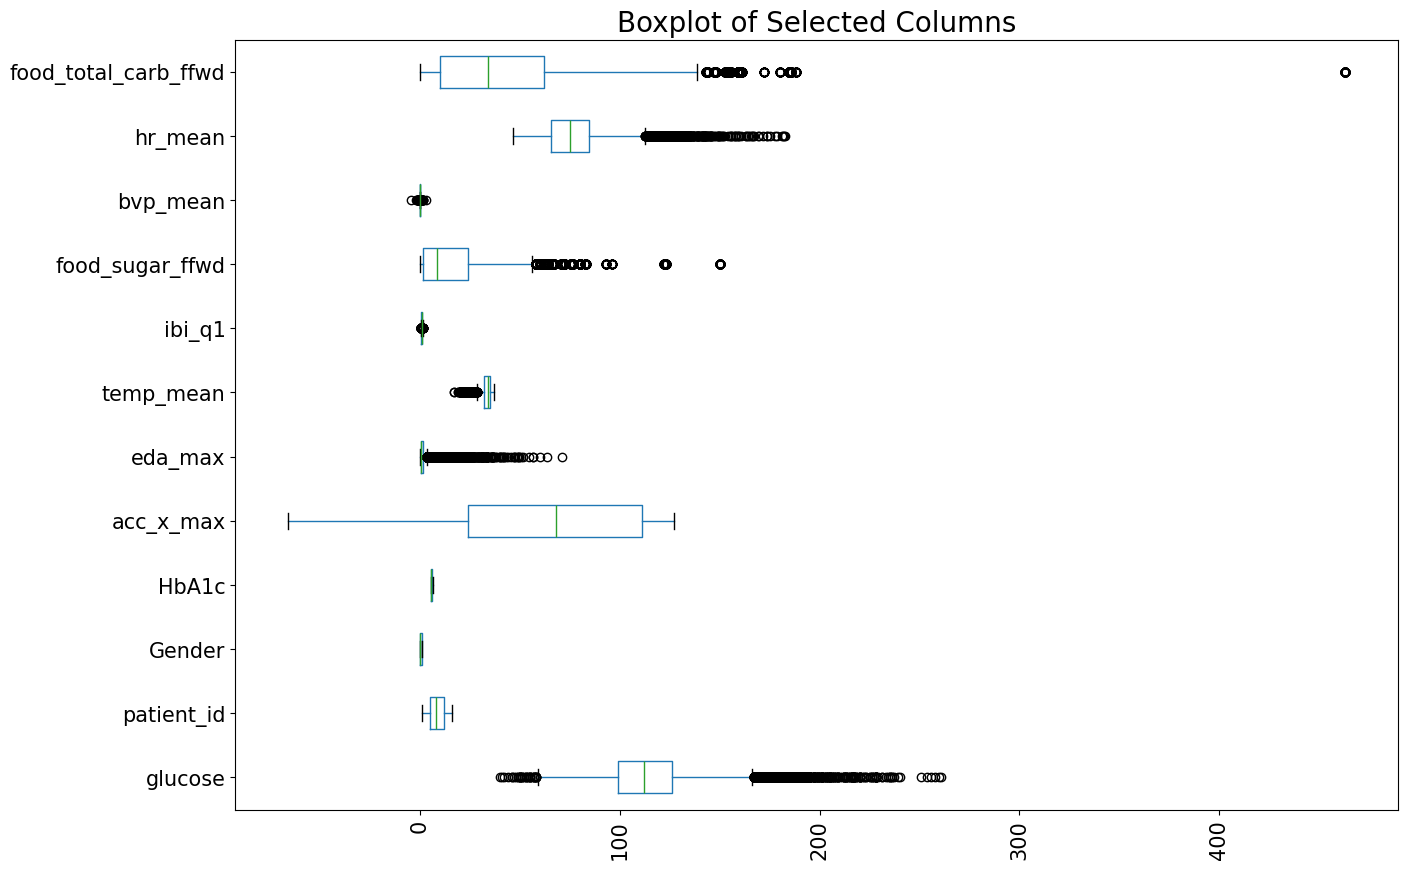

In [37]:

plt.figure(figsize=(15, 10))
boxplot = eda_df.boxplot(grid=False, vert=False, fontsize=15)
plt.title('Boxplot of Selected Columns', fontsize=20)
plt.xticks(rotation=90)
plt.show()


Correlation Matrix of Features

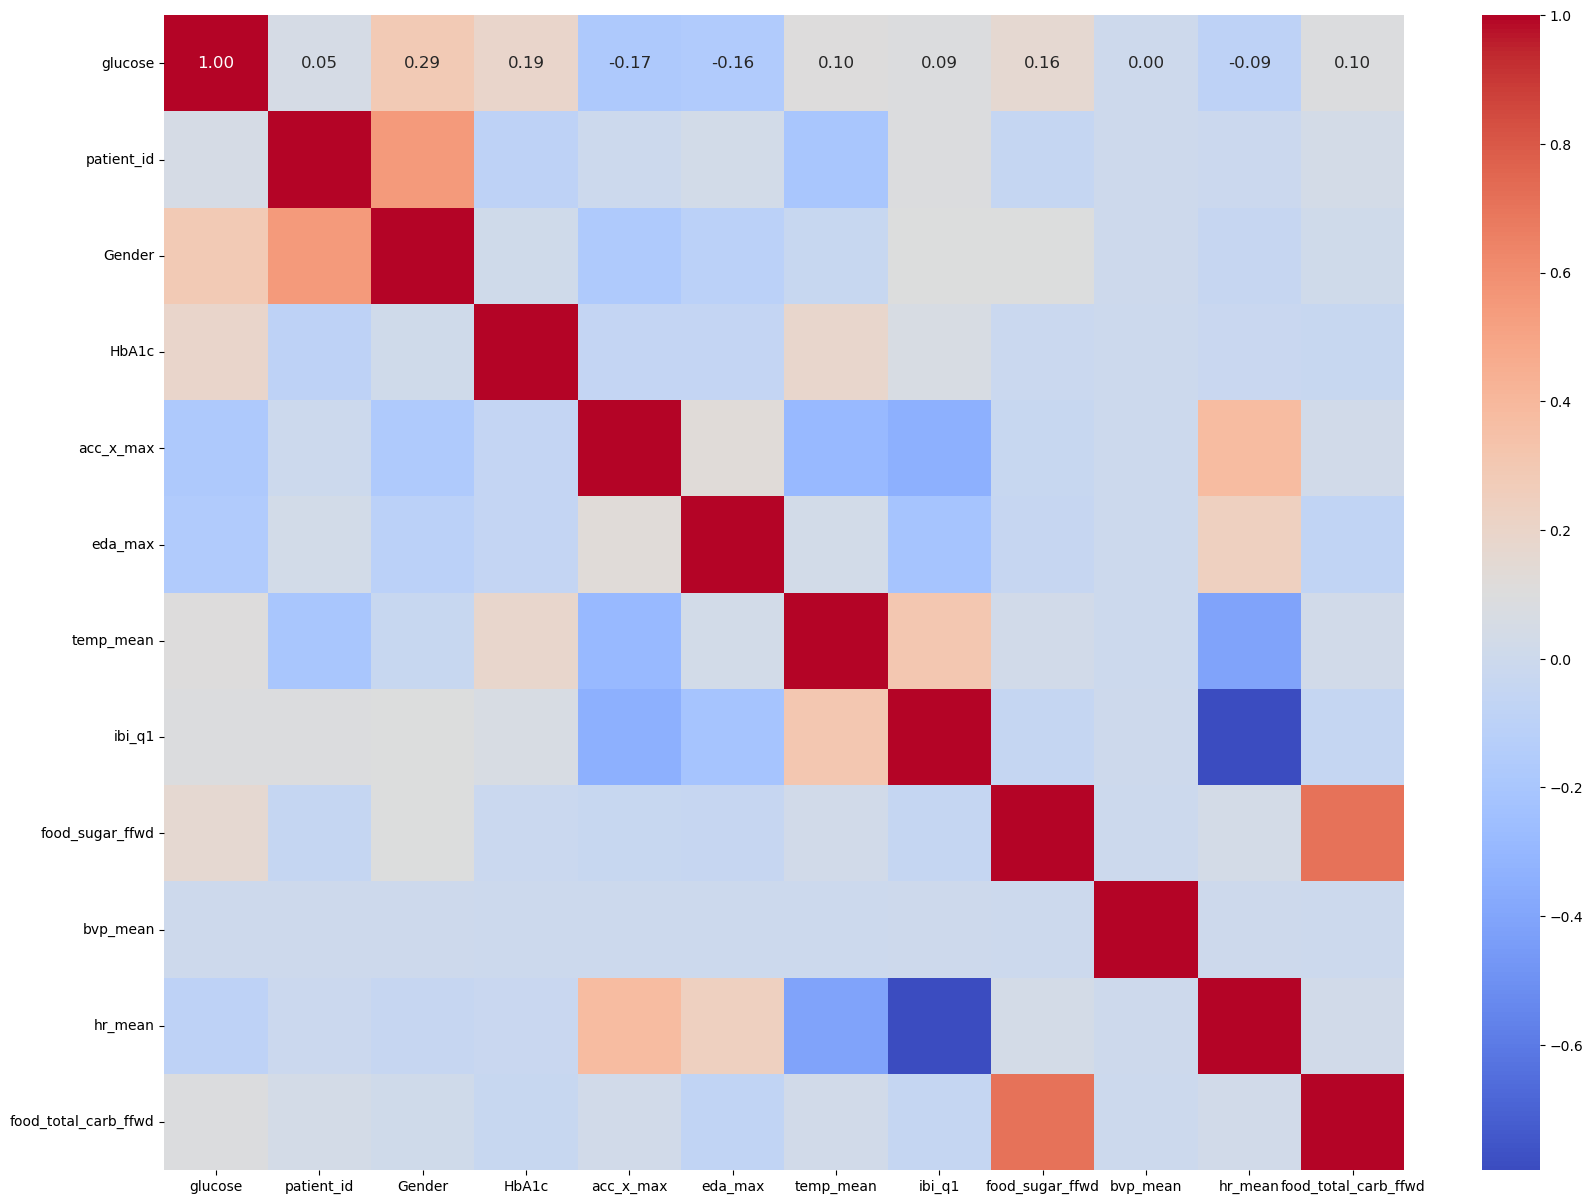

In [38]:
# Compute the correlation matrix
corr = eda_df.corr()

# Create a larger figure
plt.figure(figsize=(20, 15))

# Create a heatmap with smaller annotation font
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 12})

plt.show()

In [39]:
# Get correlations with 'glucose' and sort them in descending order
glucose_corr = corr['glucose'].sort_values(key=lambda x: x.abs(), ascending=False)

print(glucose_corr)

glucose                 1.000000
Gender                  0.288043
HbA1c                   0.192463
acc_x_max              -0.174532
food_sugar_ffwd         0.161010
eda_max                -0.156942
temp_mean               0.103961
food_total_carb_ffwd    0.095014
ibi_q1                  0.091913
hr_mean                -0.087197
patient_id              0.047186
bvp_mean                0.003186
Name: glucose, dtype: float64


Scatter Plots of Features

/var/folders/mn/5t8x6ck57719dt2pg7h0_xl40000gn/T/ipykernel_10763/2058675889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df.replace([np.inf, -np.inf], np.nan, inplace=True)


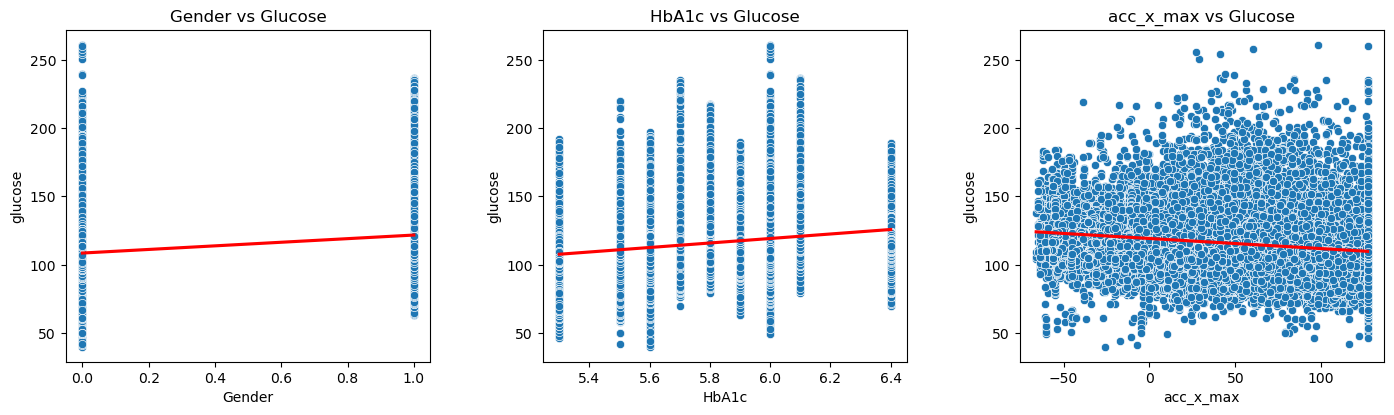

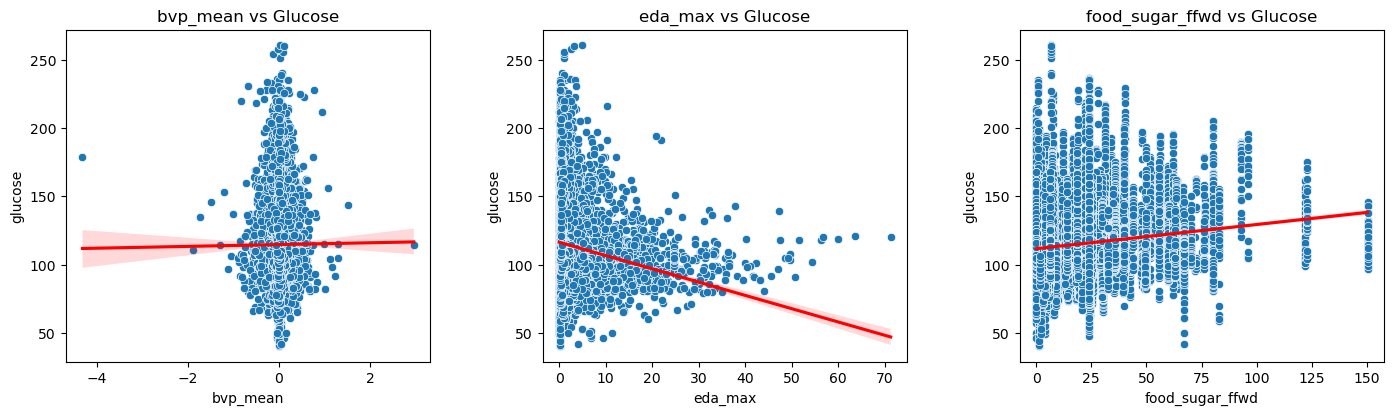

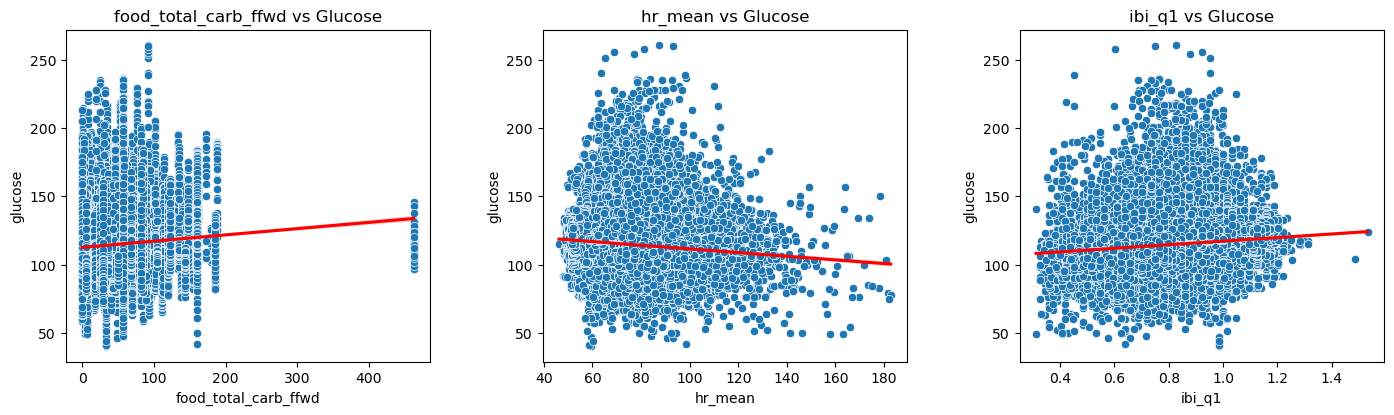

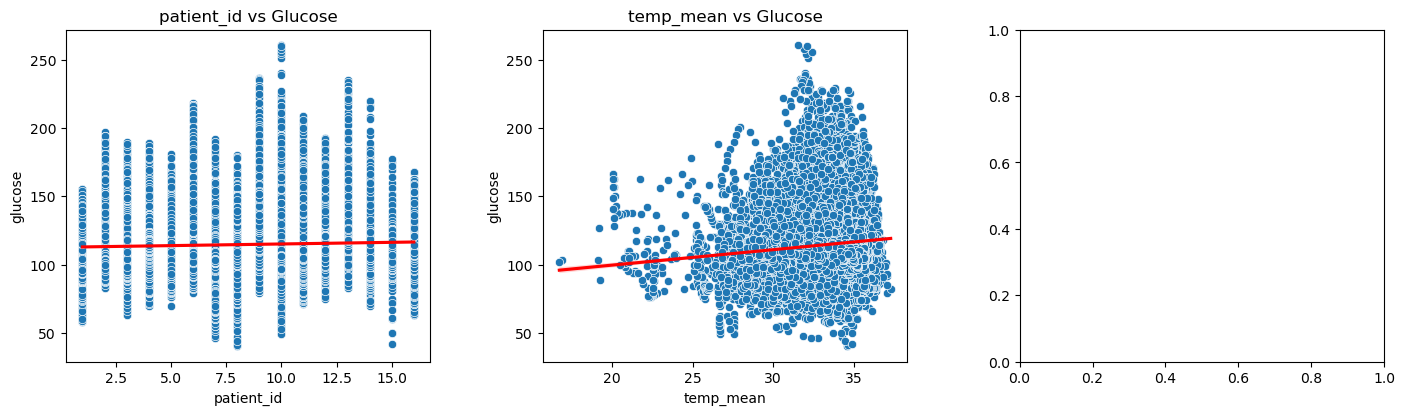

In [40]:

# Remove 'glucose' from the features list to avoid comparing it to itself
features = eda_df.columns.difference(['glucose'])

# Remove infinite and NaN values
eda_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Number of rows and columns of subplots
n_rows = 1
n_cols = 3

# Iterate over features 3 at a time
for i in range(0, len(features), n_cols):
    # Get current features
    curr_features = features[i:i + n_cols]

    # Create subplots
    figure, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))
    figure.tight_layout(pad=5.0)

    for j, feature in enumerate(curr_features):
        # Create scatter plot for each feature with glucose on y-axis
        sns.scatterplot(data=eda_df, x=feature, y='glucose', ax=axes[j])

        # Add a red linear regression line
        sns.regplot(data=eda_df, x=feature, y='glucose', ax=axes[j], scatter=False, color='red')

        # Title each plot with the feature name
        axes[j].set_title(f"{feature} vs Glucose", fontsize=12)

    # Show the figure with current subplots
    plt.show()


Some of these look like an expotential function may be the best line of fit, so let's take the log of the feature to decide this

Log Feature improvement of Correlation wrt Glucose

In [41]:
log_df = eda_df.copy()

for column in log_df.columns:
    # Apply transformation only to columns with number data types and not 'glucose'
    if column != 'glucose':
        # Shift values by minimum value, resulting in all values being positive
        minimum_value = log_df[column].min()
        shifted_data = log_df[column] - minimum_value + 1

        # Apply log (x + 1) transformation after shifting to positive numbers
        log_df['log_' + column] = np.log1p(shifted_data)

# Get columns excluding 'glucose' for correlation calculation
regular_columns = [col for col in log_df.columns if col != 'glucose' and not col.startswith('log_')]

# Calculate correlations for regular values
corr_regular = log_df[regular_columns + ['glucose']].corr()['glucose'].drop('glucose')

# Calculate correlations for logged values
logged_columns = ['log_' + col for col in regular_columns]
corr_logged = log_df[logged_columns + ['glucose']].corr()['glucose'].drop('glucose')

# Remove 'log_' prefix from logged_columns for matching with regular_columns
corr_logged.index = [col.replace('log_', '') for col in corr_logged.index]

# Create DataFrame with correlations (the correlations are matched by index which represents column names)
corr_df = pd.DataFrame({
    'Regular': corr_regular,
    'Logged': corr_logged,
    'Difference': corr_regular.sub(corr_logged)
})

# Drop rows with missing values
corr_df = corr_df.dropna()

# Apply rounding to the 'Difference' column
corr_df['Difference'] = corr_df['Difference'].round(5)

print(corr_df)


                       Regular    Logged  Difference
patient_id            0.047186  0.042579     0.00461
Gender                0.288043  0.288043    -0.00000
HbA1c                 0.192463  0.204627    -0.01216
acc_x_max            -0.174532 -0.145596    -0.02894
eda_max              -0.156942 -0.200720     0.04378
temp_mean             0.103961  0.098545     0.00542
ibi_q1                0.091913  0.093443    -0.00153
food_sugar_ffwd       0.161010  0.156988     0.00402
bvp_mean              0.003186  0.000100     0.00309
hr_mean              -0.087197 -0.075951    -0.01125
food_total_carb_ffwd  0.095014  0.103245    -0.00823


Looks like eda_max improved the correlation but nothing major. Can revist during feature engineering

Time Series plot For Patient 001

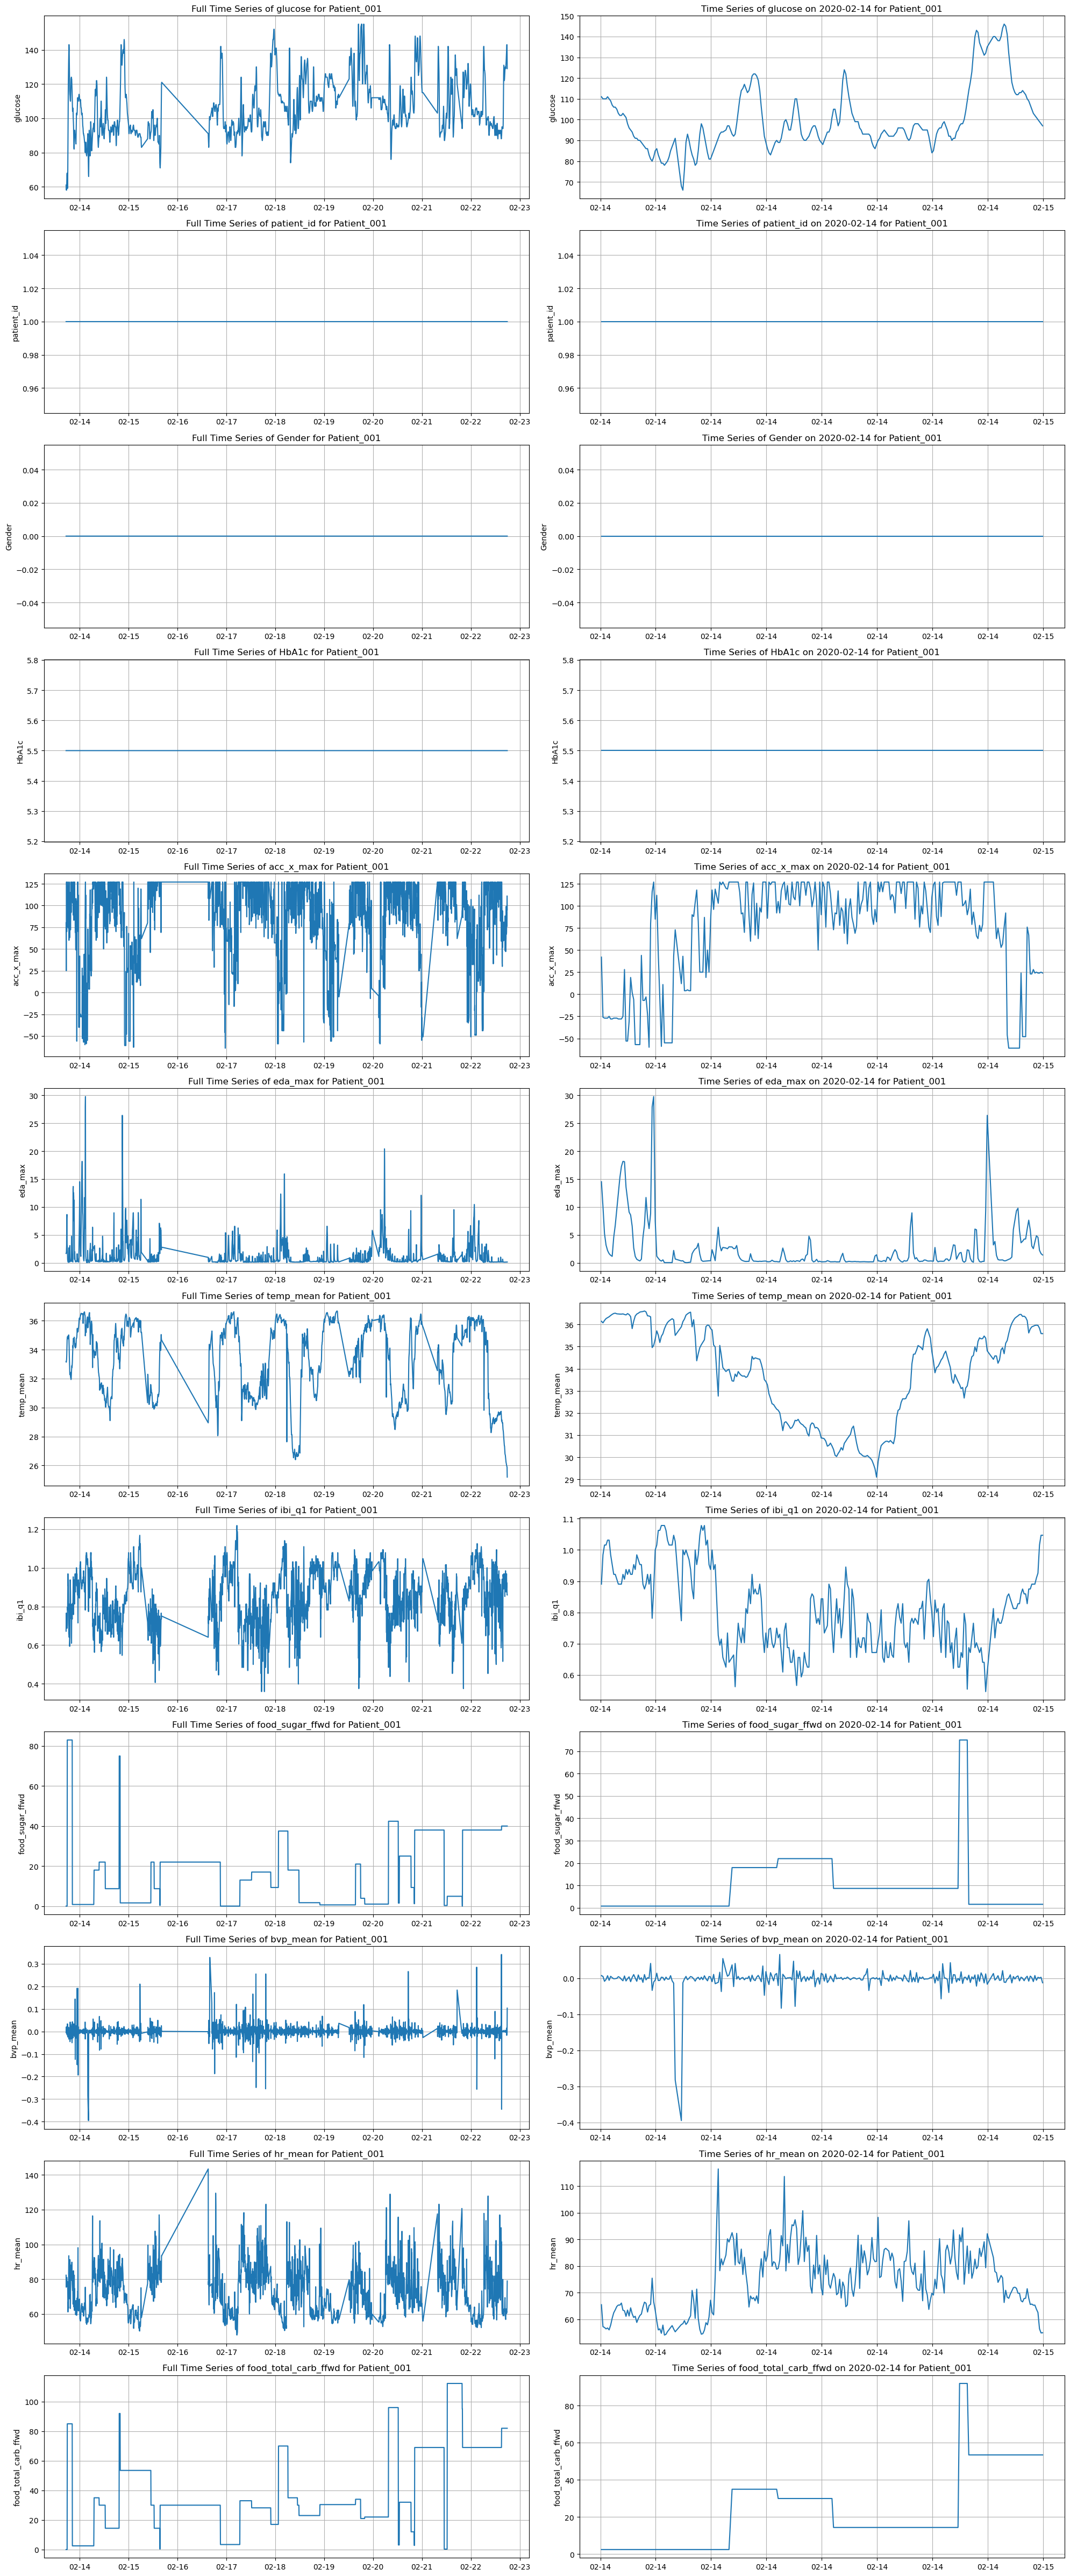

In [42]:


# Assuming 'eda_df' is your DataFrame containing time series data
# and you want to filter it for 'patient_001'
eda_df_patient_001 = eda_df[eda_df['patient_id'] == 1]

# Filter numeric columns
numeric_columns = eda_df_patient_001.select_dtypes(include=['number']).columns

# Calculate number of columns needed for subplots
num_features = len(numeric_columns)
num_cols = 2  # Two subplots side by side for each feature
num_rows = num_features  # One row per feature

# Plot time series in a num_rows x num_cols grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))

# Iterate over each numeric feature
for i, col in enumerate(numeric_columns):
    # Plot full time series on the left subplot
    ax_full = axes[i, 0] if num_rows > 1 else axes[0]
    ax_full.plot(eda_df_patient_001.index, eda_df_patient_001[col])
    ax_full.set_title(f'Full Time Series of {col} for Patient_001')
    ax_full.set_ylabel(col)
    ax_full.grid(True)
    ax_full.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Plot specific day (2020-02-14) on the right subplot
    specific_day = '2020-02-14'
    df_specific_day = eda_df_patient_001[eda_df_patient_001.index.date == pd.to_datetime(specific_day).date()]
    ax_specific_day = axes[i, 1] if num_rows > 1 else axes[1]
    ax_specific_day.plot(df_specific_day.index, df_specific_day[col])
    ax_specific_day.set_title(f'Time Series of {col} on {specific_day} for Patient_001')
    ax_specific_day.set_ylabel(col)
    ax_specific_day.grid(True)
    ax_specific_day.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Adjust layout
plt.tight_layout()
plt.show()


Categorical Feature Addition - Night, Morning, Afternoon, Evening

/var/folders/mn/5t8x6ck57719dt2pg7h0_xl40000gn/T/ipykernel_10763/2709285757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['hour_of_day'] = eda_df.index.hour
/var/folders/mn/5t8x6ck57719dt2pg7h0_xl40000gn/T/ipykernel_10763/2709285757.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_df['day_period'] = eda_df['hour_of_day'].apply(get_day_period)


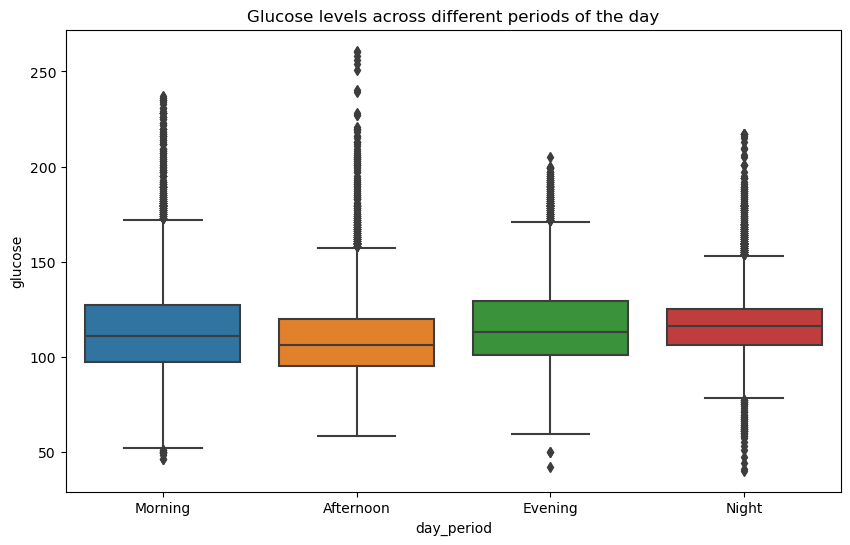

In [43]:
# Extract hour from index
eda_df['hour_of_day'] = eda_df.index.hour

# Define function to categorize day period
def get_day_period(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:  # 18 <= hour < 24
        return 'Evening'

# Apply the function to 'hour_of_day' to create 'day_period' column
eda_df['day_period'] = eda_df['hour_of_day'].apply(get_day_period)

# Drop the 'hour_of_day' column as it is no longer needed
eda_df = eda_df.drop('hour_of_day', axis=1)


plt.figure(figsize=(10, 6))
sns.boxplot(x='day_period', y='glucose', data=eda_df, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Glucose levels across different periods of the day")
plt.show()

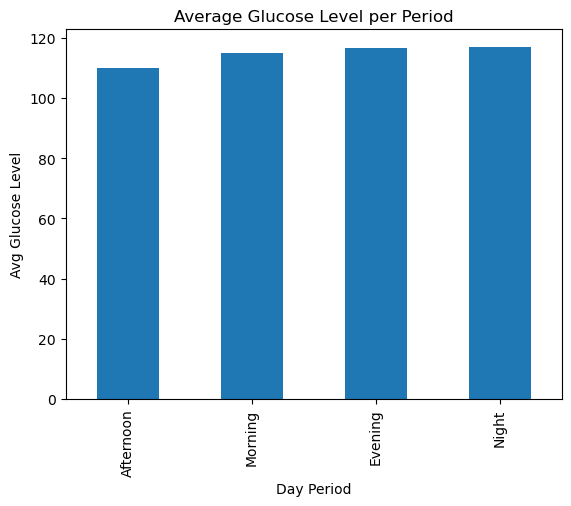

In [44]:
avg_glucose = eda_df.groupby('day_period')['glucose'].mean().sort_values()
avg_glucose.plot(kind='bar')
plt.title('Average Glucose Level per Period')
plt.xlabel('Day Period')
plt.ylabel('Avg Glucose Level')
plt.show()


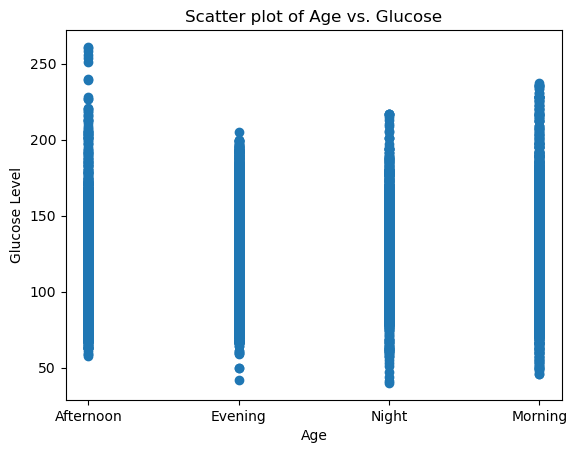

In [45]:
plt.scatter(eda_df['day_period'], eda_df['glucose'])
plt.title('Scatter plot of Age vs. Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.show()


Categorical Get Dummies for day_period

In [46]:
# Create new dataframe with dummy variables
eda_df_encoded = pd.get_dummies(eda_df, columns=['day_period'])

# Convert new one-hot encoded columns to integers
for column in eda_df_encoded.columns:
    if 'day_period' in column:  # this checks if 'day_period' is in the column name
        eda_df_encoded[column] = eda_df_encoded[column].astype(int)


Categorical Correlations wrt Glucose

In [47]:
# Compute correlation of 'glucose' with other columns
# Calculate correlations
correlations = eda_df_encoded.corr()['glucose']

# Sort correlations by absolute value, but keep the original positive/negative correlations
sorted_correlations = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

# Top 30 correlations
top_30_correlations = sorted_correlations.head(50)

print(top_30_correlations)


glucose                 1.000000
Gender                  0.288043
HbA1c                   0.192463
acc_x_max              -0.174532
food_sugar_ffwd         0.161010
eda_max                -0.156942
day_period_Afternoon   -0.121612
temp_mean               0.103961
food_total_carb_ffwd    0.095014
ibi_q1                  0.091913
hr_mean                -0.087197
day_period_Night        0.058764
day_period_Evening      0.051767
patient_id              0.047186
day_period_Morning      0.010155
bvp_mean                0.003186
Name: glucose, dtype: float64


day_period_afternoon has a beneficial correlation wrt to glucose. 

Augmented Dickey-Fuller (ADF) test

In [48]:
from statsmodels.tsa.stattools import adfuller
# Perform ADF test
result = adfuller(eda_df['glucose'])

# Extract and print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -16.289203330156706
p-value: 3.351529386838784e-29
Critical Values:
   1%: -3.430595603518893
   5%: -2.8616485496117634
   10%: -2.566827777733606


Based on these results, there is robust evidence to conclude that the glucose time series in our df is stationary. This is important for time series analysis and modeling, as stationarity assumptions are crucial for many statistical techniques and models.

Stationarity Definition: A time series is considered stationary if its statistical properties (such as mean, variance, and autocovariance) are constant over time. This means that, on average, the time series doesn't change its behavior over different time periods.

ADF Test and Stationarity: The Augmented Dickey-Fuller (ADF) test helps determine if a time series is stationary. It does this by testing the null hypothesis that a unit root is present in the time series (indicating non-stationarity) against the alternative hypothesis of stationarity.